In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit as cf
from scipy.stats import chi2
from scipy.signal import find_peaks as pk
from math import floor

In [13]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 20
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [14]:
def chi2_red(y,y_err,x,func,popt):
    puntos = len(y)
    params = len(popt)
    grados_lib = puntos - params - 1
    y_ajuste = func(x,*popt)
    
    chi_cuadrado = np.sum(((y-y_ajuste)/y_err)**2)
    chi_reducido = chi_cuadrado/grados_lib
    return chi_reducido

def r2(y,x,lineal,pars):
    r2 = 1 - (np.sum((y-lineal(x,*pars))**2)/np.sum((y - np.mean(y))**2))
    return r2

dcmls = lambda x : -int(floor(np.log10(abs(x))))

In [15]:
def leermd(filename):
    result = []
    from pandas import read_csv
    df = read_csv(filename, sep='\t', skiprows=3, decimal=',')
    nparray = df.values
    nparray = nparray[~np.isnan(nparray).any(axis=1)]
    for cols in range(nparray.shape[1]):
        out = nparray[:,cols]
        result.append(out)
    return result

In [16]:
L0 = 34.0 # cm
L1 = 9.5 # cm
L = 22 # cm
err_L = 0.1 # cm

lineal = lambda x,a,b : a*x+b

La longitud de onda es (726.9202922704264 ± 4.894163968968108e-06) nm
0.20409152662542818
0.9983609036835834


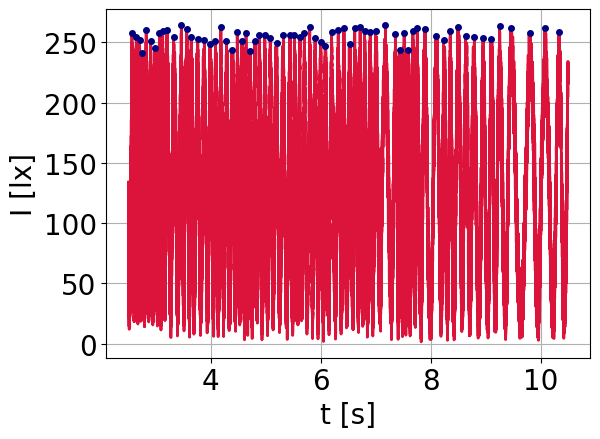

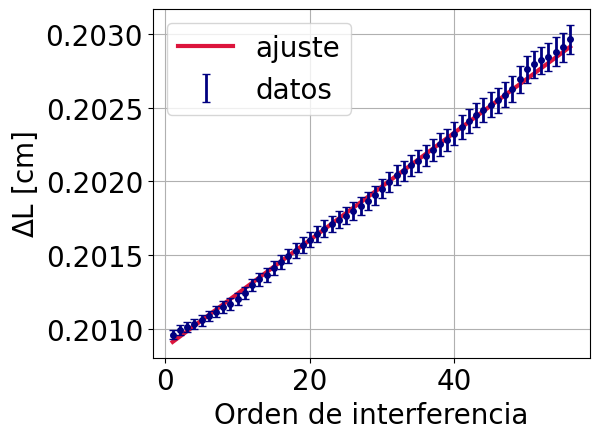

In [36]:
t1,i1 = leermd('test data 1')
delta1 = 0.003 # cm
speed1 = delta1/8 # cm/s

err_t = 1/20000 # s
err_delta = 0.0001 # cm
err_speed1 = np.sqrt((err_delta/8)**2+(err_t*delta1/64)**2)

t1 = t1[int(2.5*20000):int(10.5*20000)]
i1 = i1[int(2.5*20000):int(10.5*20000)]

picos1 = pk(i1,height=240,distance=1000)[0]

t_max1 = t1[picos1]
x_max1 = 0.2 + speed1*t_max1[:56]
m1 = np.arange(1,len(x_max1)+1,1)

err_xmax1 = np.sqrt((err_speed1*t_max1[:56])**2 + (speed1*err_t)**2)
#err_xmax1 = np.zeros_like(x_max1) + err_delta/10

pars1,cov1 = cf(lineal,m1,x_max1,sigma=err_xmax1,absolute_sigma=True)
#pars1,cov1 = cf(lineal,m1,x_max1)
a1,b1 = pars1
err_a1 = cov1[0,0]
x_adj1 = np.linspace(min(m1),max(m1),100)
y_adj1 = lineal(x_adj1,a1,b1)

print(f'La longitud de onda es ({2*a1*10**7} ± {2*err_a1*10**7}) nm')

print(chi2_red(x_max1,err_xmax1,m1,lineal,pars1))
print(r2(x_max1,m1,lineal,pars1))

plt.scatter(t1[picos1],i1[picos1],c='navy',label='máximos',zorder=2)
plt.plot(t1,i1,'crimson',label='datos',zorder=1)
#plt.xlim(2.5,3.5)
plt.grid()
plt.xlabel('t [s]')
plt.ylabel('I [lx]')
plt.show()
plt.plot(x_adj1,y_adj1,'crimson',linewidth=3,label='ajuste',zorder=1)
plt.errorbar(m1,x_max1,yerr=err_xmax1,fmt='None',ecolor='navy',label='datos',zorder=2)
plt.scatter(m1,x_max1,c='navy',zorder=3)
#plt.scatter(m1[55],x_max1[55],c='crimson',label='datos',zorder=3)
plt.ylabel(r'$\Delta$L [cm]')
plt.xlabel('Orden de interferencia')
plt.grid()
plt.legend()
plt.savefig('plots/max1.png')

La longitud de onda es (845.2697535687166 ± 1.3266001786186899e-05) nm
0.10841209139908112
0.9979307740518775


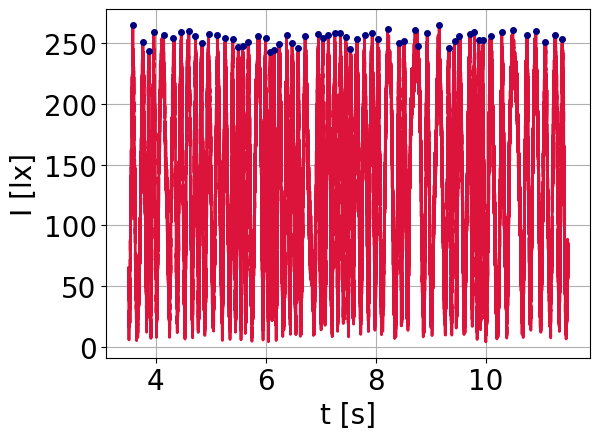

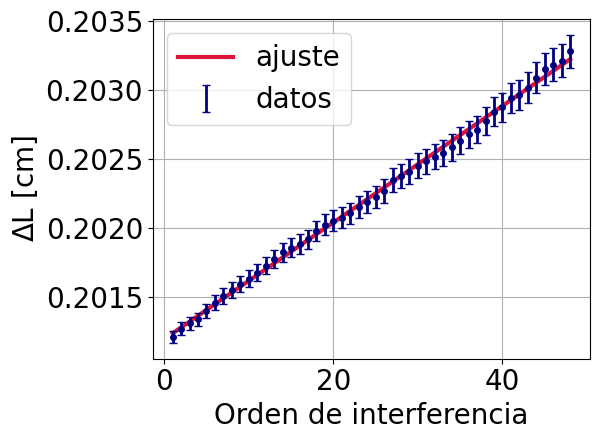

In [37]:
t2,i2 = leermd('test data 2')
delta2 = 0.0027 # cm
speed2 = delta2/8 # cm/s

err_speed2 = np.sqrt((err_delta/8)**2+(err_t*delta2/64)**2)

t2 = t2[int(3.5*20000):int(11.5*20000)]
i2 = i2[int(3.5*20000):int(11.5*20000)]

picos2 = pk(i2,height=240,distance=1000)[0]

t_max2 = t2[picos2]
x_max2 = 0.2 + speed2*t_max2[:48]
m2 = np.arange(1,len(x_max2)+1,1)

err_xmax2 = np.sqrt((err_speed2*t_max2[:48])**2 + (speed2*err_t)**2)
#err_xmax2 = np.zeros_like(x_max2) + err_delta/10

pars2,cov2 = cf(lineal,m2,x_max2,sigma=err_xmax2,absolute_sigma=True)
#pars2,cov2 = cf(lineal,m2,x_max2)
a2,b2 = pars2
err_a2 = cov2[0,0]
x_adj2 = np.linspace(min(m2),max(m2),100)
y_adj2 = lineal(x_adj2,a2,b2)

print(f'La longitud de onda es ({2*a2*10**7} ± {2*err_a2*10**7}) nm')

print(chi2_red(x_max2,err_xmax2,m2,lineal,pars2))
print(r2(x_max2,m2,lineal,pars2))

plt.scatter(t2[picos2],i2[picos2],c='navy',label='máximos',zorder=2)
plt.plot(t2,i2,'crimson',label='datos',zorder=1)
#plt.xlim(2.5,3.5)
plt.grid()
plt.xlabel('t [s]')
plt.ylabel('I [lx]')
plt.show()
plt.plot(x_adj2,y_adj2,'crimson',linewidth=3,label='ajuste',zorder=1)
plt.errorbar(m2,x_max2,yerr=err_xmax2,fmt='None',ecolor='navy',label='datos',zorder=2)
plt.scatter(m2,x_max2,c='navy',zorder=3)
#plt.scatter(m2[47],x_max2[47],c='crimson',label='datos',zorder=3)
plt.ylabel(r'$\Delta$L [cm]')
plt.xlabel('Orden de interferencia')
plt.legend()
plt.grid()
plt.savefig('plots/max2.png')

La longitud de onda es (863.9088013448519 ± 3.70745095040724e-06) nm
0.30218859968206696
0.9970503231010023


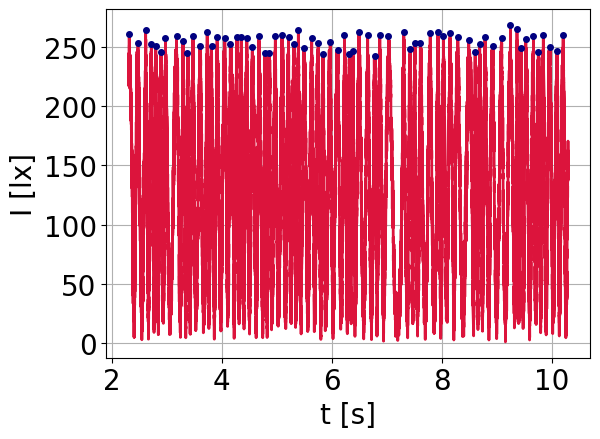

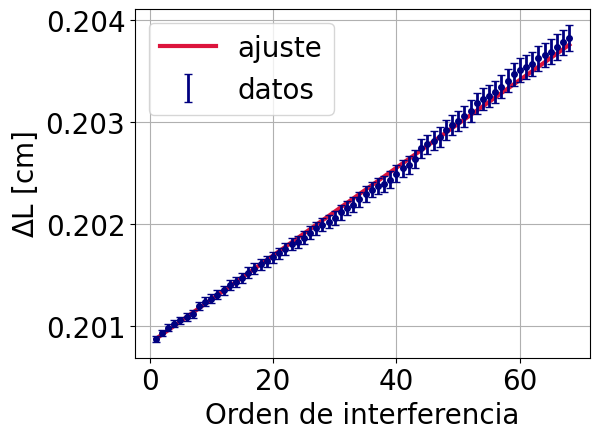

In [43]:
t3,i3 = leermd('test data 3')
delta3 = 0.003 # cm
speed3 = delta3/8 # cm/s

err_speed3 = np.sqrt((err_delta/8)**2+(err_t*delta3/64)**2)

t3 = t3[int(2.3*20000):int(10.3*20000)]
i3 = i3[int(2.3*20000):int(10.3*20000)]

picos3 = pk(i3,height=240,distance=1000)[0]

t_max3 = t3[picos3]
x_max3 = 0.2 + speed3*t_max3
m3 = np.arange(1,len(x_max3)+1,1)

err_xmax3 = np.sqrt((err_speed3*t_max3)**2 + (speed3*err_t)**2)
#err_xmax3 = np.zeros_like(x_max3) + err_delta/10

pars3,cov3 = cf(lineal,m3,x_max3,sigma=err_xmax3,absolute_sigma=True)
#pars3,cov3 = cf(lineal,m3,x_max3)
a3,b3 = pars3
err_a3 = cov3[0,0]
x_adj3 = np.linspace(min(m3),max(m3),100)
y_adj3 = lineal(x_adj3,a3,b3)

print(f'La longitud de onda es ({2*a3*10**7} ± {2*err_a3*10**7}) nm')

print(chi2_red(x_max3,err_xmax3,m3,lineal,pars3))
print(r2(x_max3,m3,lineal,pars3))

plt.scatter(t3[picos3],i3[picos3],c='navy',label='máximos',zorder=2)
plt.plot(t3,i3,'crimson',label='datos',zorder=1)
#plt.xlim(2.3,10.3)
plt.grid()
plt.xlabel('t [s]')
plt.ylabel('I [lx]')
plt.show()
plt.plot(x_adj3,y_adj3,'crimson',linewidth=3,label='ajuste',zorder=1)
plt.errorbar(m3,x_max3,yerr=err_xmax3,fmt='None',ecolor='navy',label='datos',zorder=2)
plt.scatter(m3,x_max3,c='navy',zorder=3)
#plt.scatter(m3[35],x_max3[35],c='crimson',label='datos',zorder=3)
plt.ylabel(r'$\Delta$L [cm]')
plt.xlabel('Orden de interferencia')
plt.legend()
plt.grid()
plt.savefig('plots/max3.png')

In [44]:
print((726.9202922704264 + 845.2697535687166 + 863.9088013448519)/3)

812.0329490613317


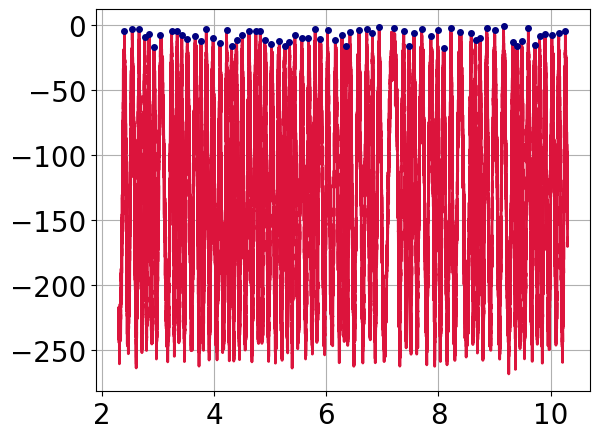

0.9369689473600986 0.03311374066944919


In [20]:
anti_i3 = -i3

anti_picos3 = pk(anti_i3,height=-20,distance=1000)[0]

t_min3 = t3[anti_picos3]
x_min3 = 0.2 + speed3*t_min3
n3 = np.arange(1,len(x_min3)+1,1)

contraste_f = (i3[picos3]-i3[anti_picos3])/(i3[picos3]+i3[anti_picos3])

plt.scatter(t3[anti_picos3],anti_i3[anti_picos3],c='navy',label='mínimos',zorder=2)
plt.plot(t3,anti_i3,'crimson',zorder=1)
plt.grid()
plt.show()

print(np.mean(contraste_f),np.std(contraste_f))

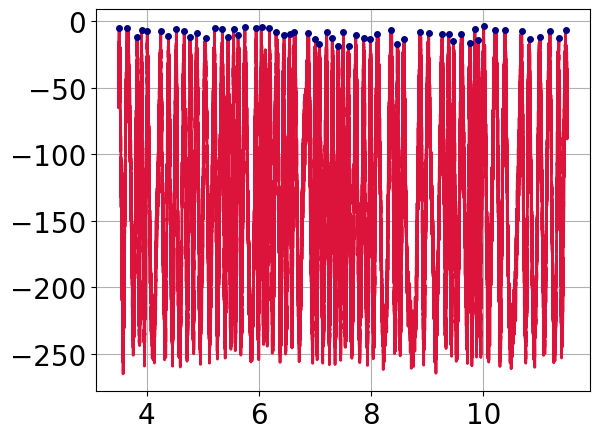

0.9269064612846221 0.027593876470118725


In [47]:
anti_i2 = -i2

anti_picos2 = pk(anti_i2,height=-20,distance=1000)[0]

t_min2 = t2[anti_picos2]
x_min2 = 0.2 + speed2*t_min2
n2 = np.arange(1,len(x_min2)+1,1)

contraste_f2 = (i2[picos2][:-1]-i2[anti_picos2])/(i2[picos2][:-1]+i2[anti_picos2])

plt.scatter(t2[anti_picos2],anti_i2[anti_picos2],c='navy',label='mínimos',zorder=2)
plt.plot(t2,anti_i2,'crimson',zorder=1)
plt.grid()
plt.show()

print(np.mean(contraste_f2),np.std(contraste_f2))

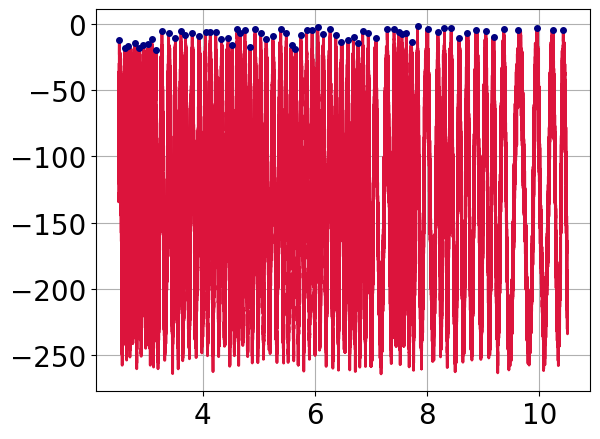

0.9374148146307626 0.034193499219873545


In [49]:
anti_i1 = -i1

anti_picos1 = pk(anti_i1,height=-20,distance=1000)[0]

t_min1 = t1[anti_picos1]
x_min1 = 0.2 + speed1*t_min1
n1 = np.arange(1,len(x_min1)+1,1)

contraste_f1 = (i1[picos1]-i1[anti_picos1])/(i1[picos1]+i1[anti_picos1])

plt.scatter(t1[anti_picos1],anti_i1[anti_picos1],c='navy',label='mínimos',zorder=2)
plt.plot(t1,anti_i1,'crimson',zorder=1)
plt.grid()
plt.show()

print(np.mean(contraste_f1),np.std(contraste_f1))

In [52]:
print((0.9374148146307626+0.9269064612846221+0.9369689473600986)/3)
print(np.sqrt(0.034193499219873545**2 + 0.027593876470118725**2 + 0.03311374066944919**2)/3)

0.9337634077584944
0.018339808640317555


0.5089269849046933 0.07111460356187047


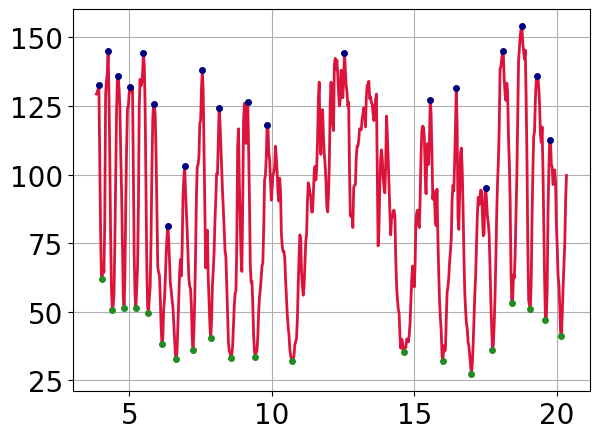

In [21]:
dxdp = 0.5/16.938 # cm/pixel

pix,i4 = np.loadtxt('Values.csv',delimiter=',',unpack=True,skiprows=1)

pix = pix[130:690]
i4 = i4[130:690]

r = abs(dxdp*pix)

ex_list1 = [10,13,14,15,16,18,19,20,21,22,23,24,26,28]

picos4 = pk(i4,height=80,distance=8)[0]
picos4_posta = []
for i in range(len(picos4)):
    if i not in ex_list1:
        picos4_posta.append(picos4[i])
picos4 = picos4_posta

ex_list2 = [10,13,14,16]

anti_picos4 = pk(-i4,height=-75,distance=8)[0]
anti_picos4_posta = []
for i in range(len(anti_picos4)):
    if i not in ex_list2:
        anti_picos4_posta.append(anti_picos4[i])
anti_picos4 = anti_picos4_posta

contraste_c = (i4[picos4]-i4[anti_picos4])/(i4[picos4]+i4[anti_picos4])
print(np.mean(contraste_c),np.std(contraste_c))

plt.plot(r,i4,c='crimson',zorder=1)
plt.scatter(r[picos4],i4[picos4],c='navy',zorder=2)
plt.scatter(r[anti_picos4],i4[anti_picos4],c='forestgreen',zorder=2)
plt.grid()

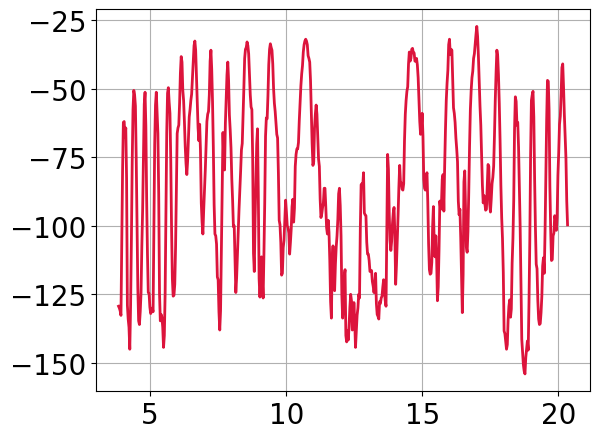

In [22]:

plt.plot(r,-i4,c='crimson',zorder=1)
plt.grid()